Task 1
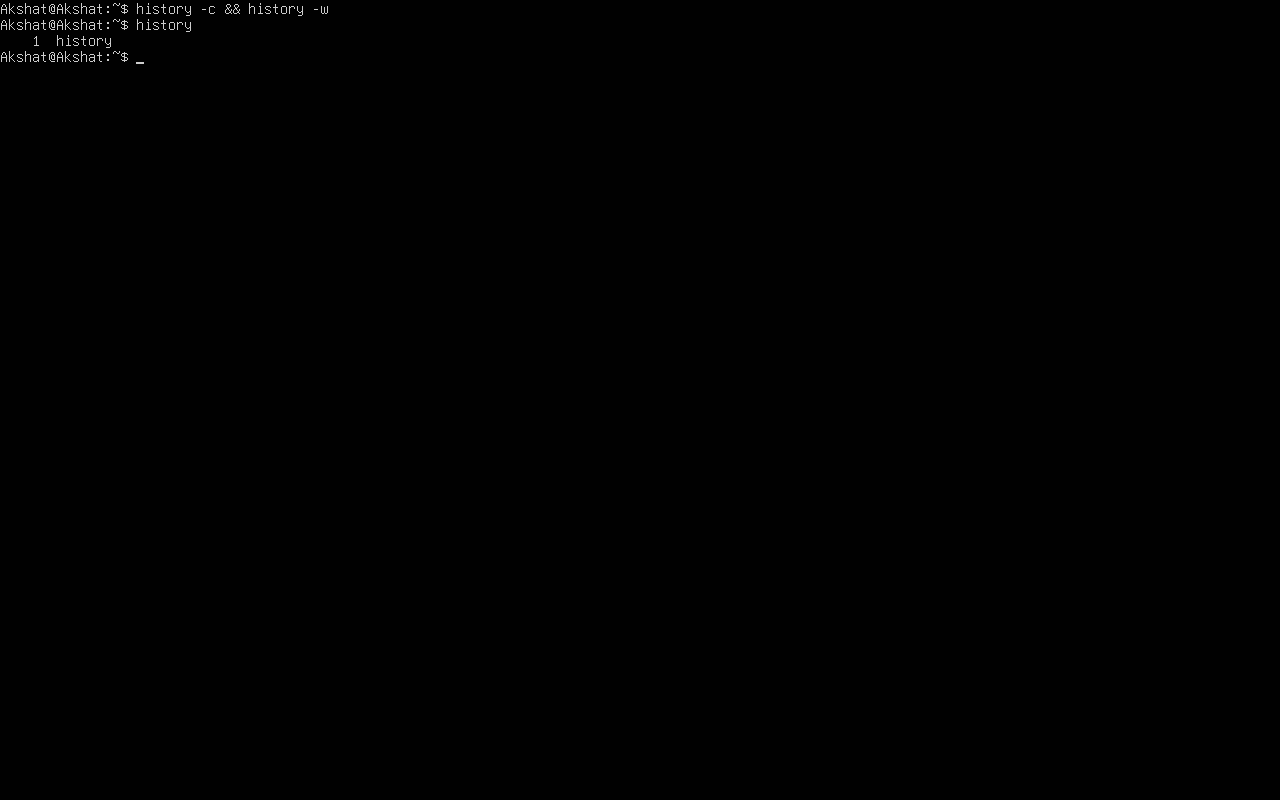


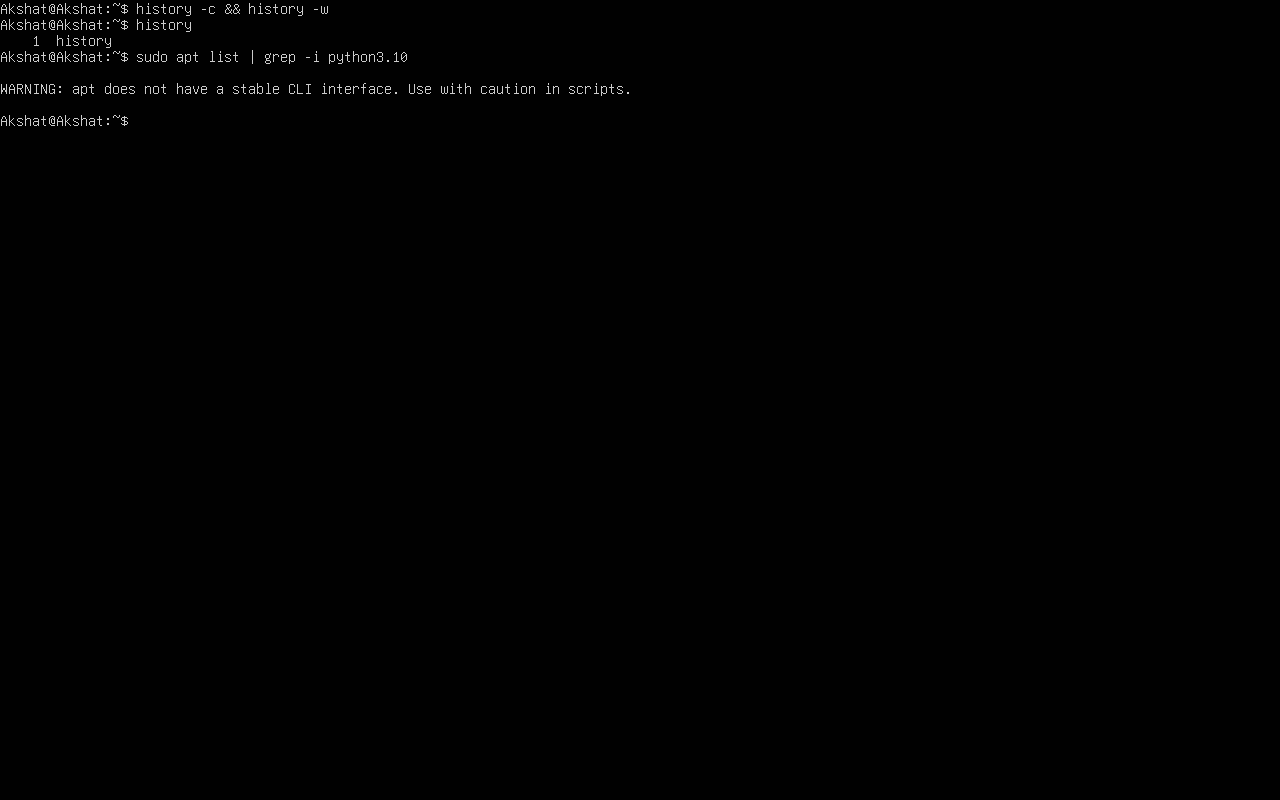

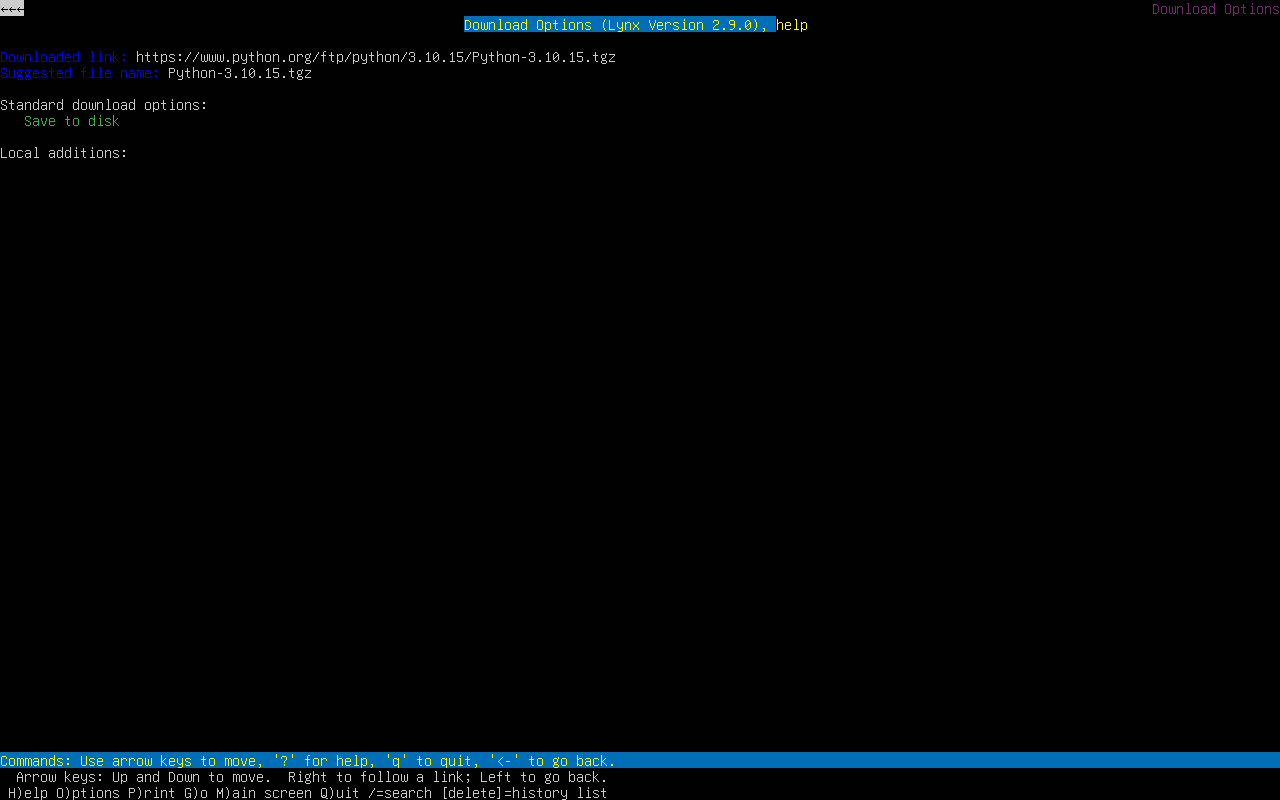

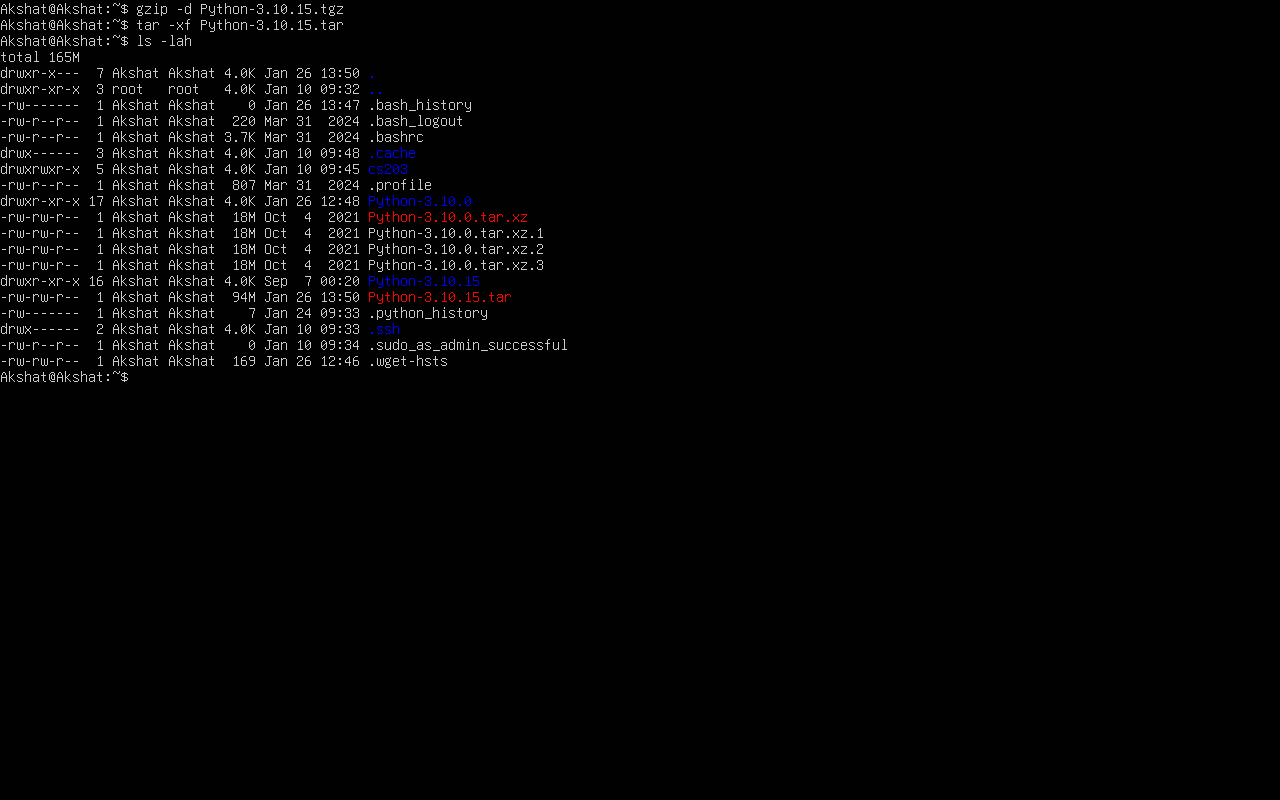

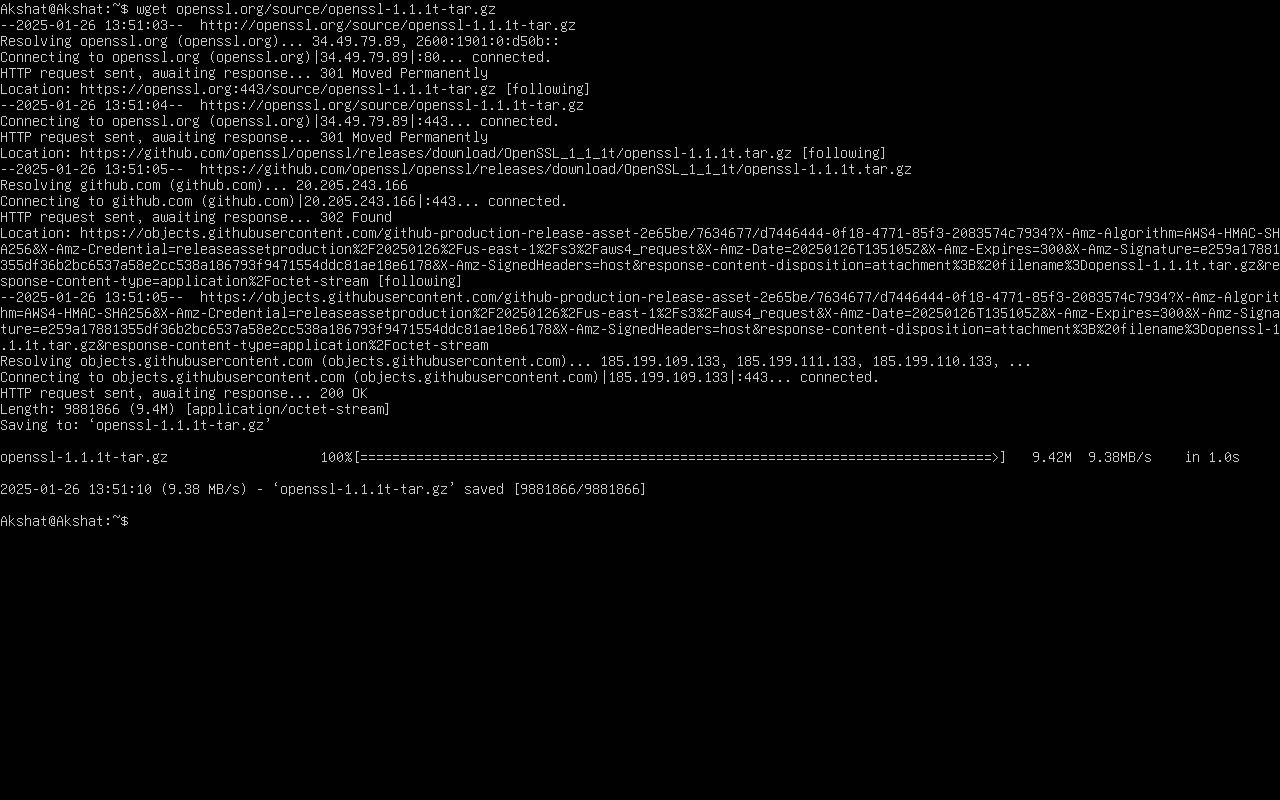

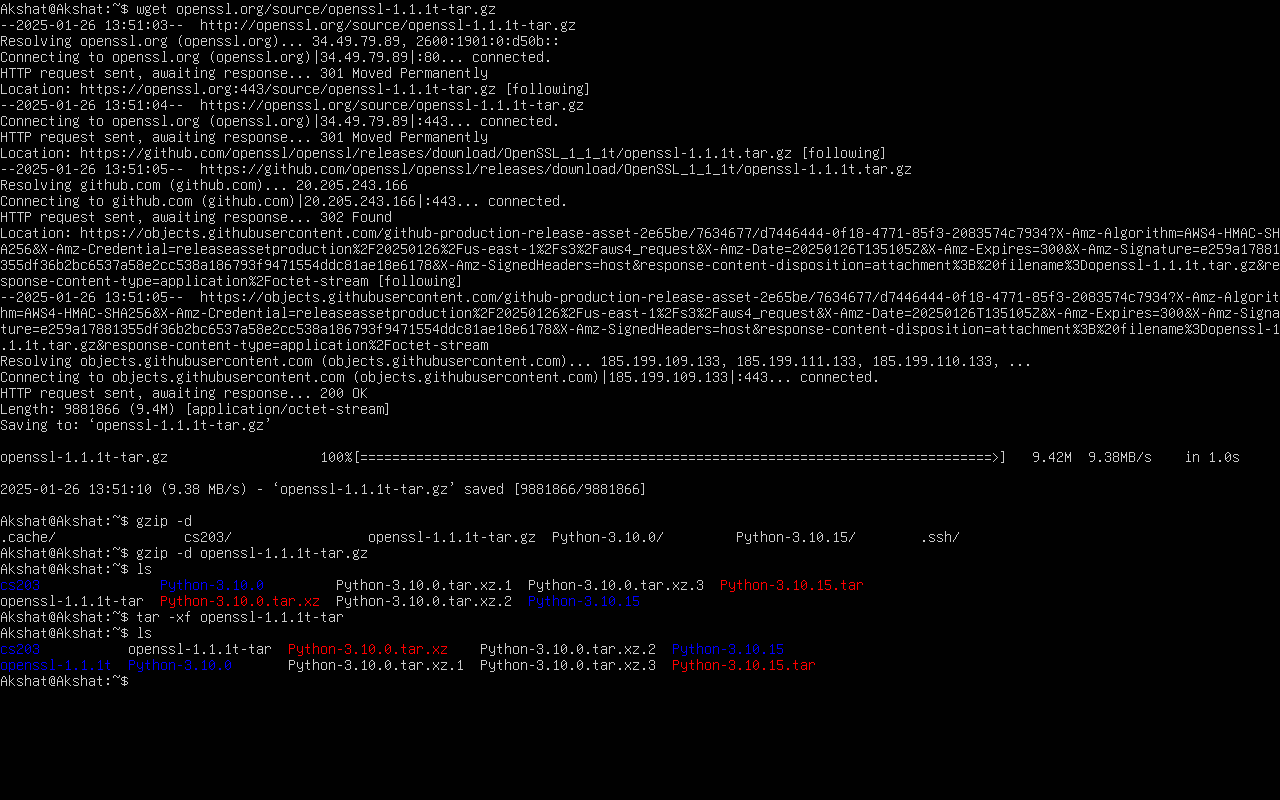

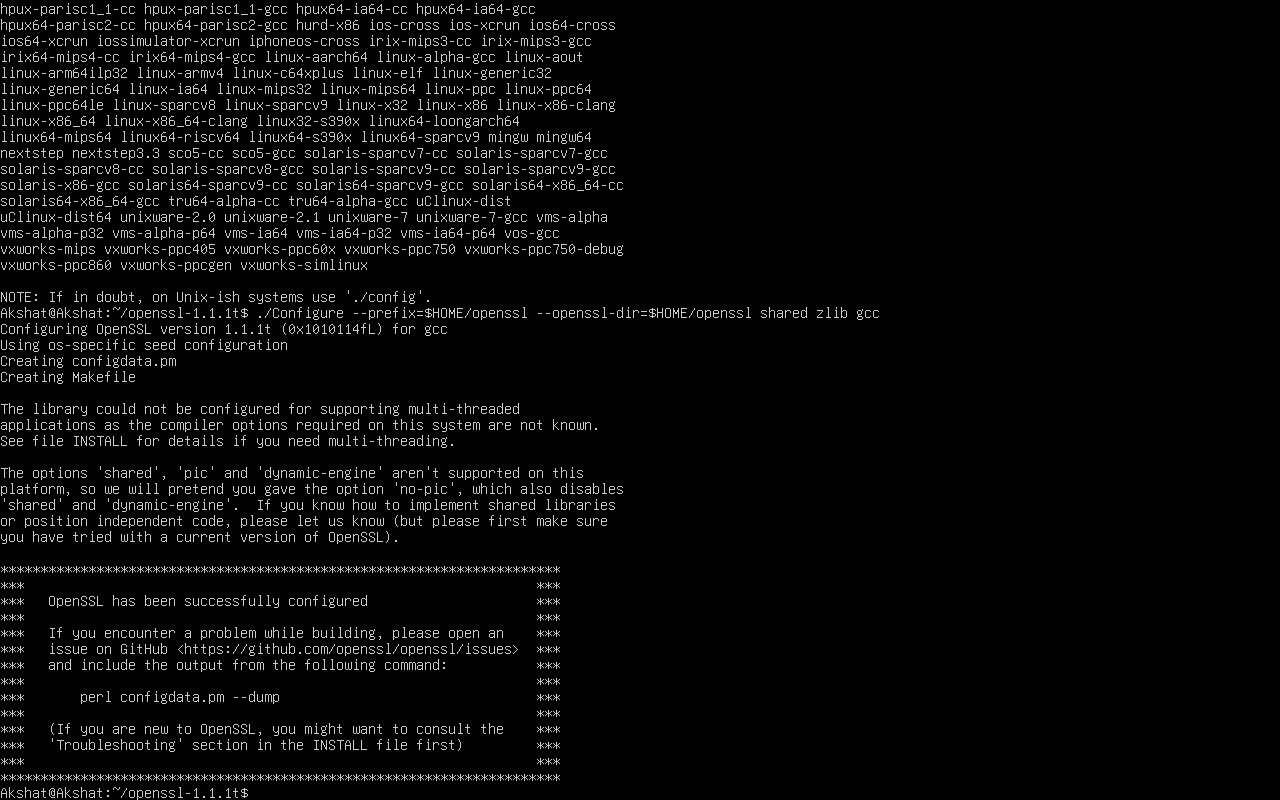

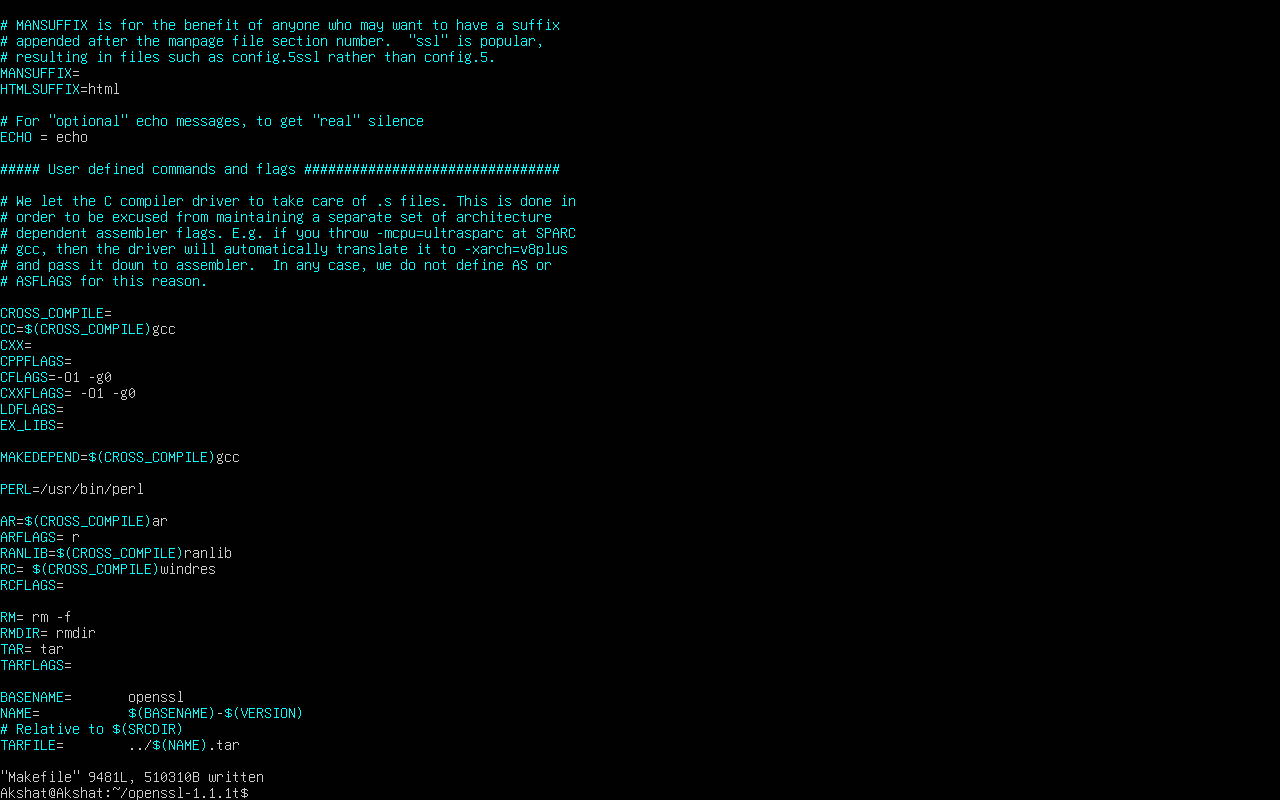

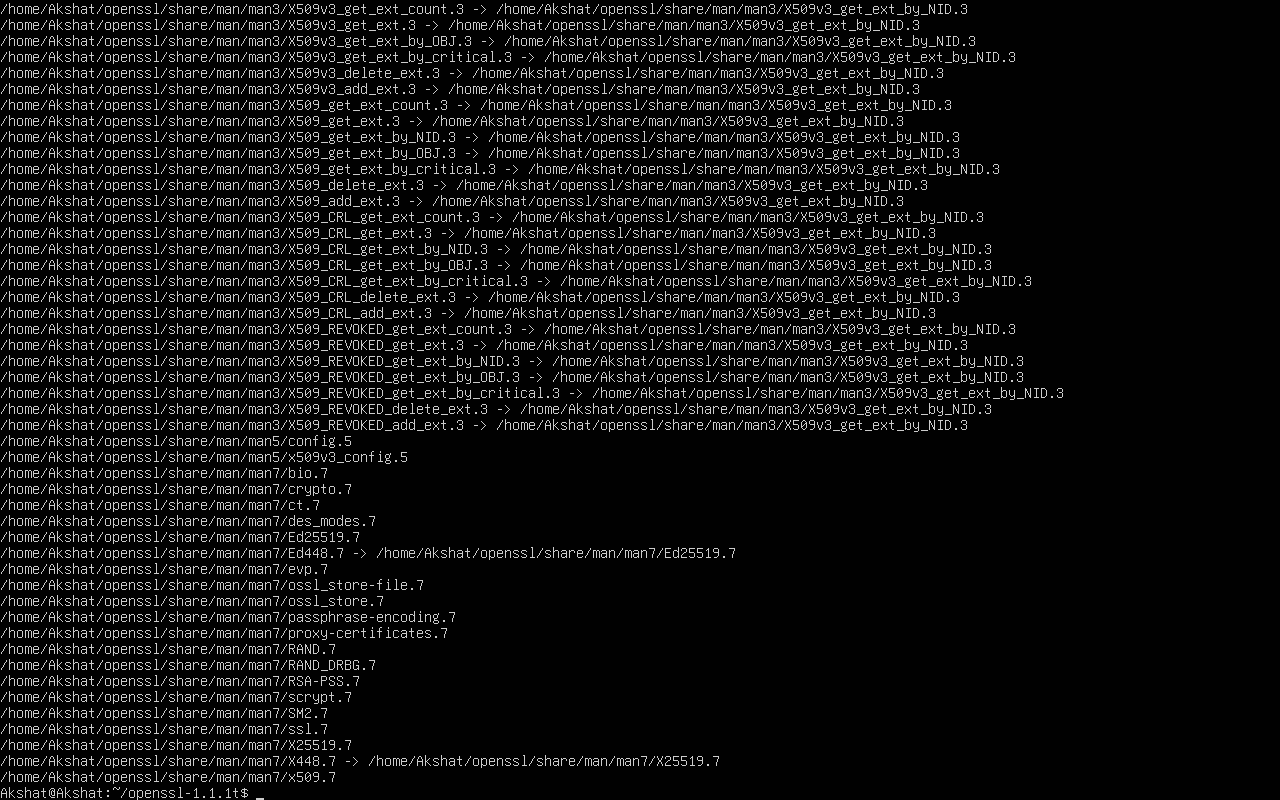

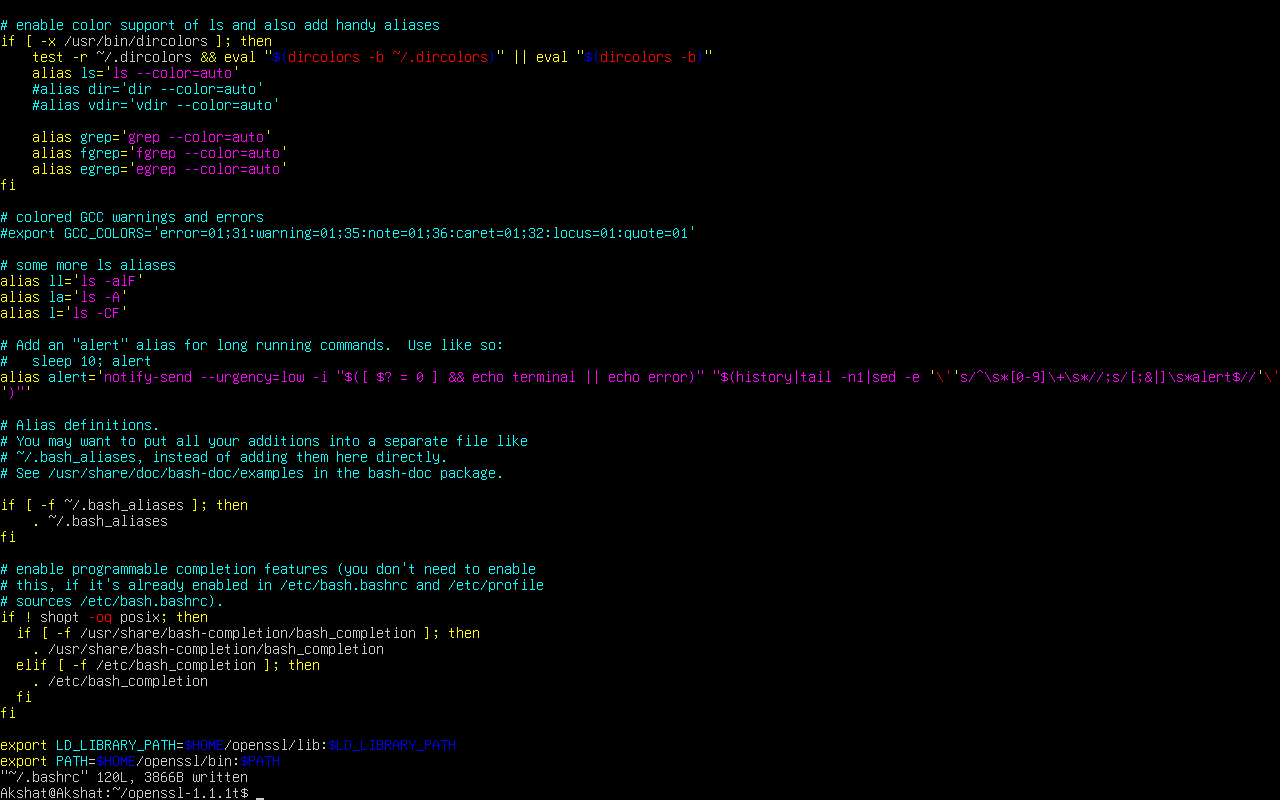

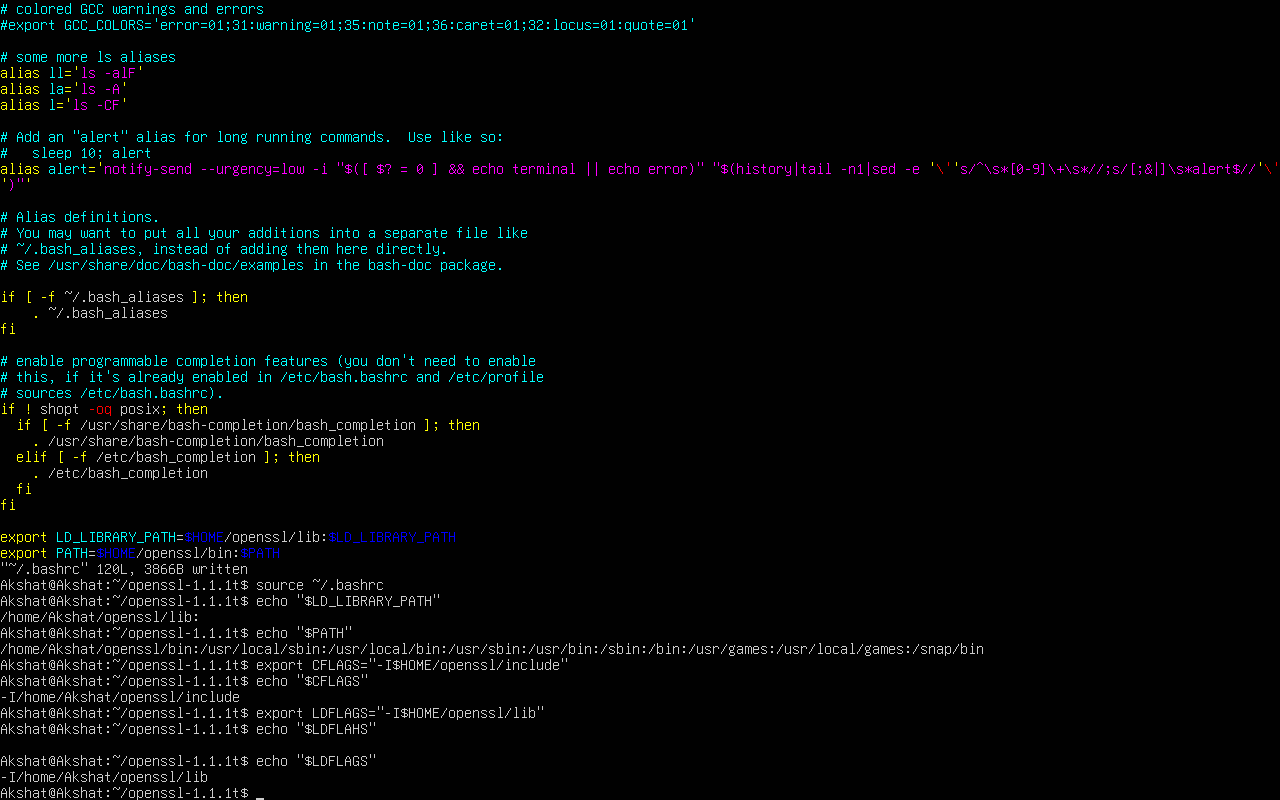

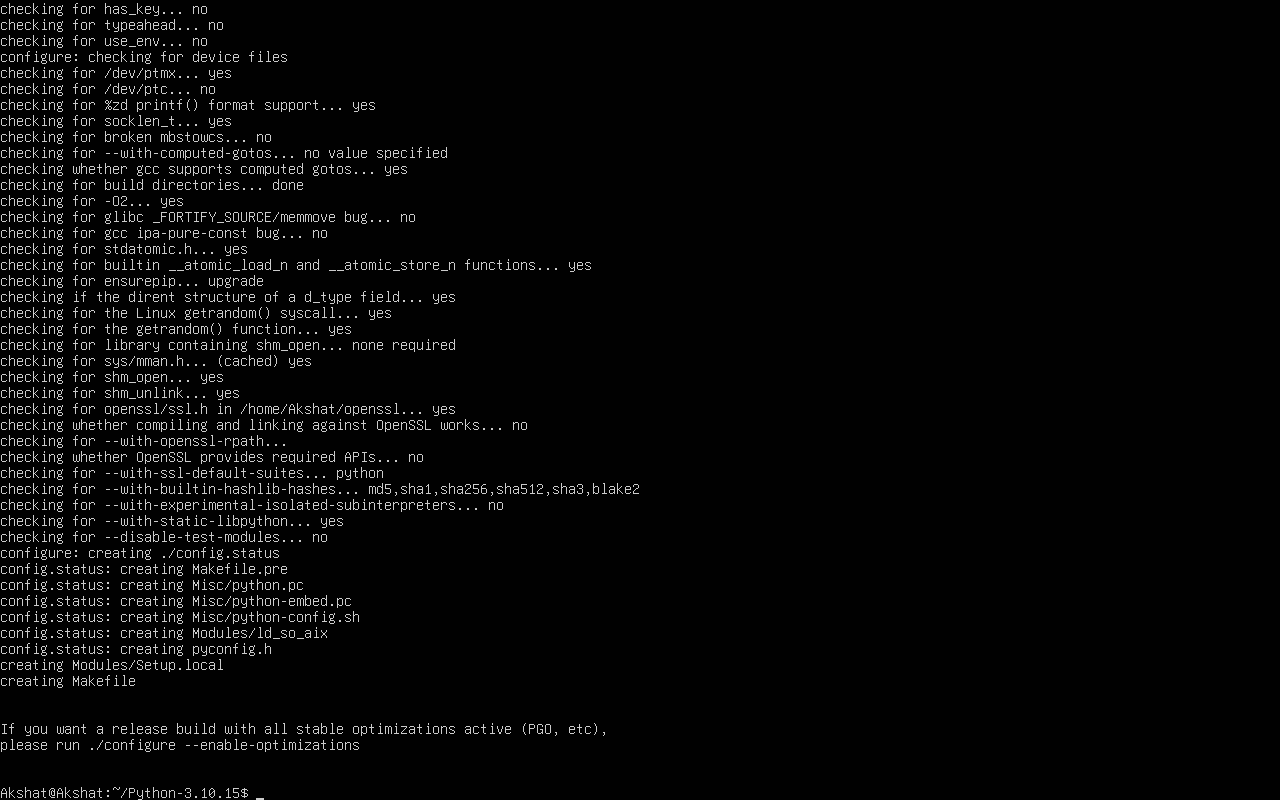

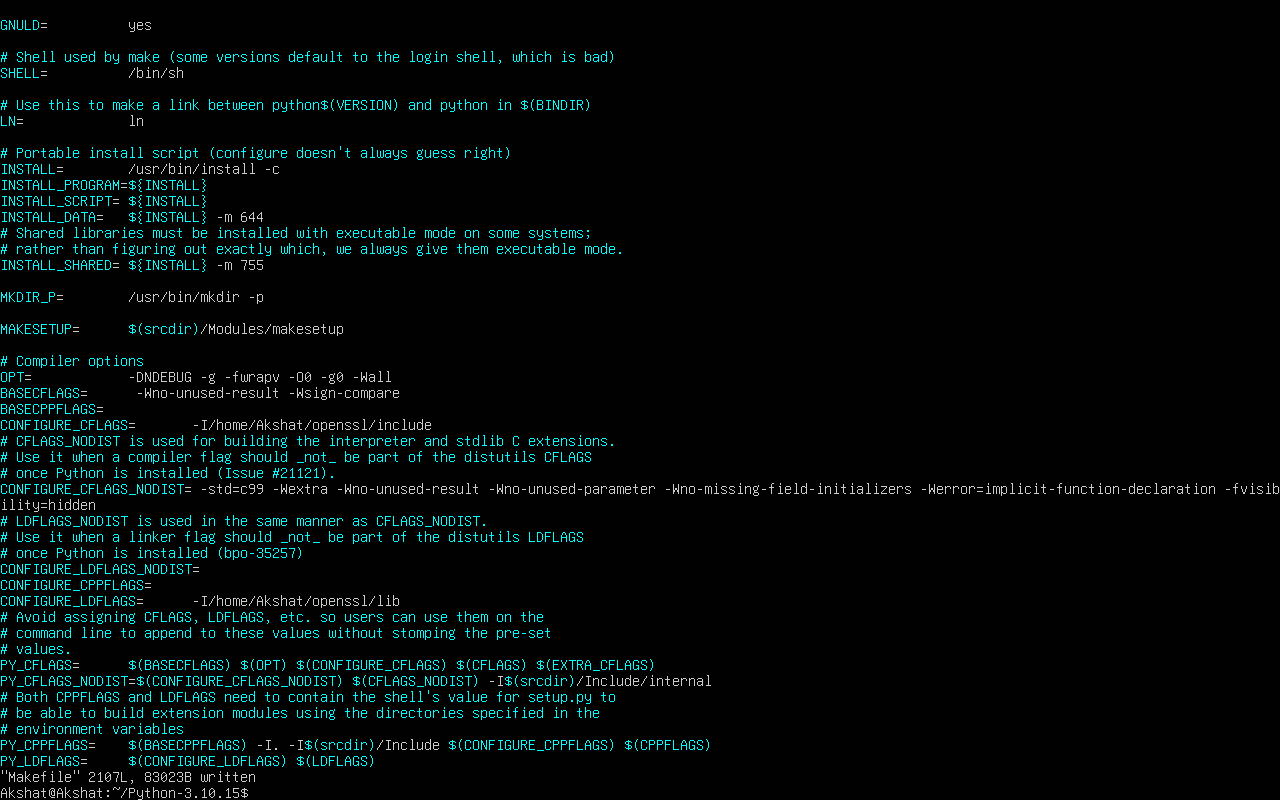

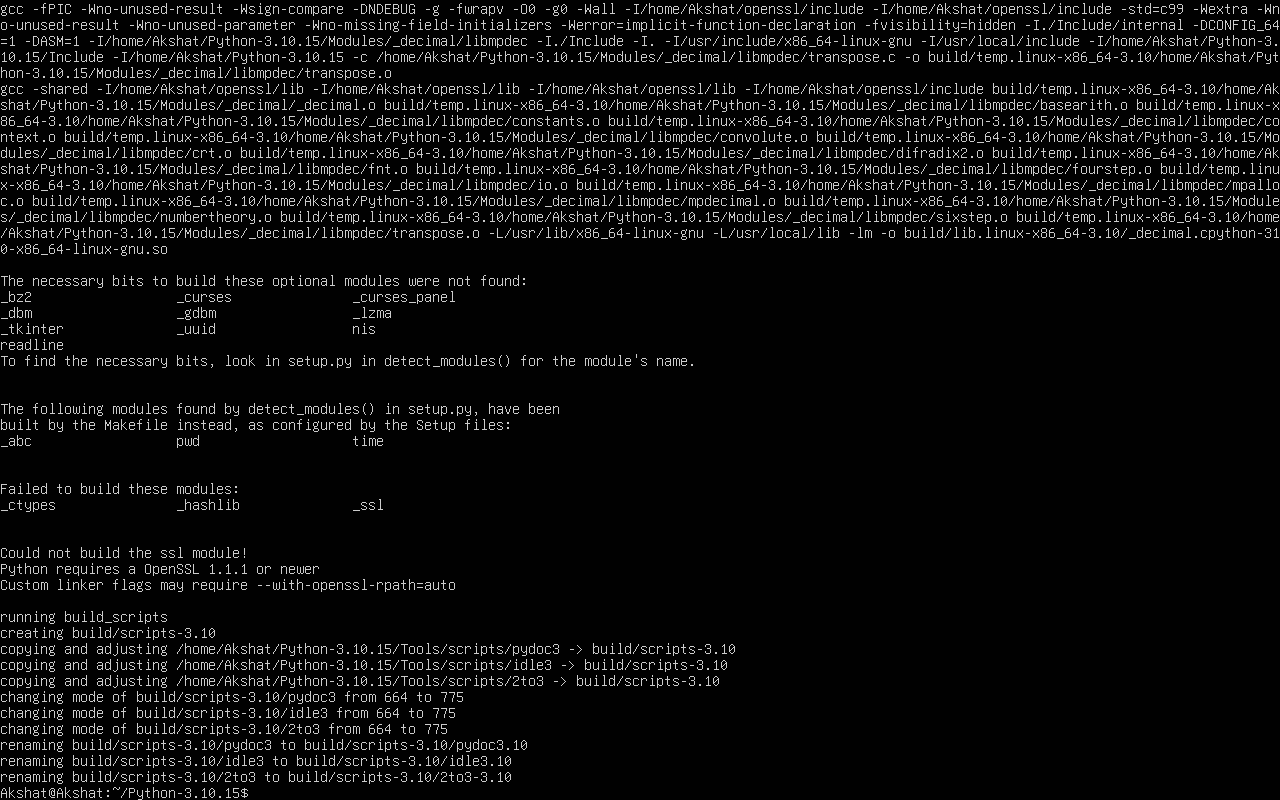

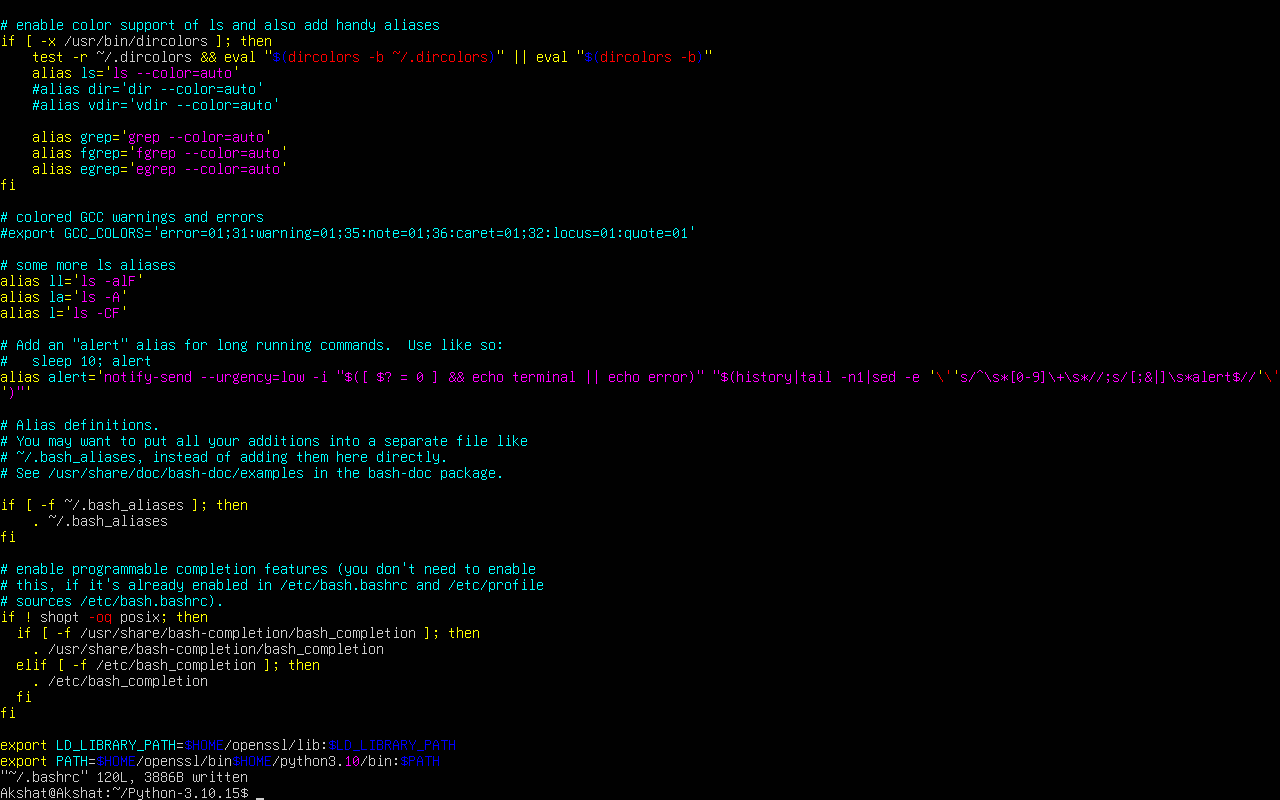

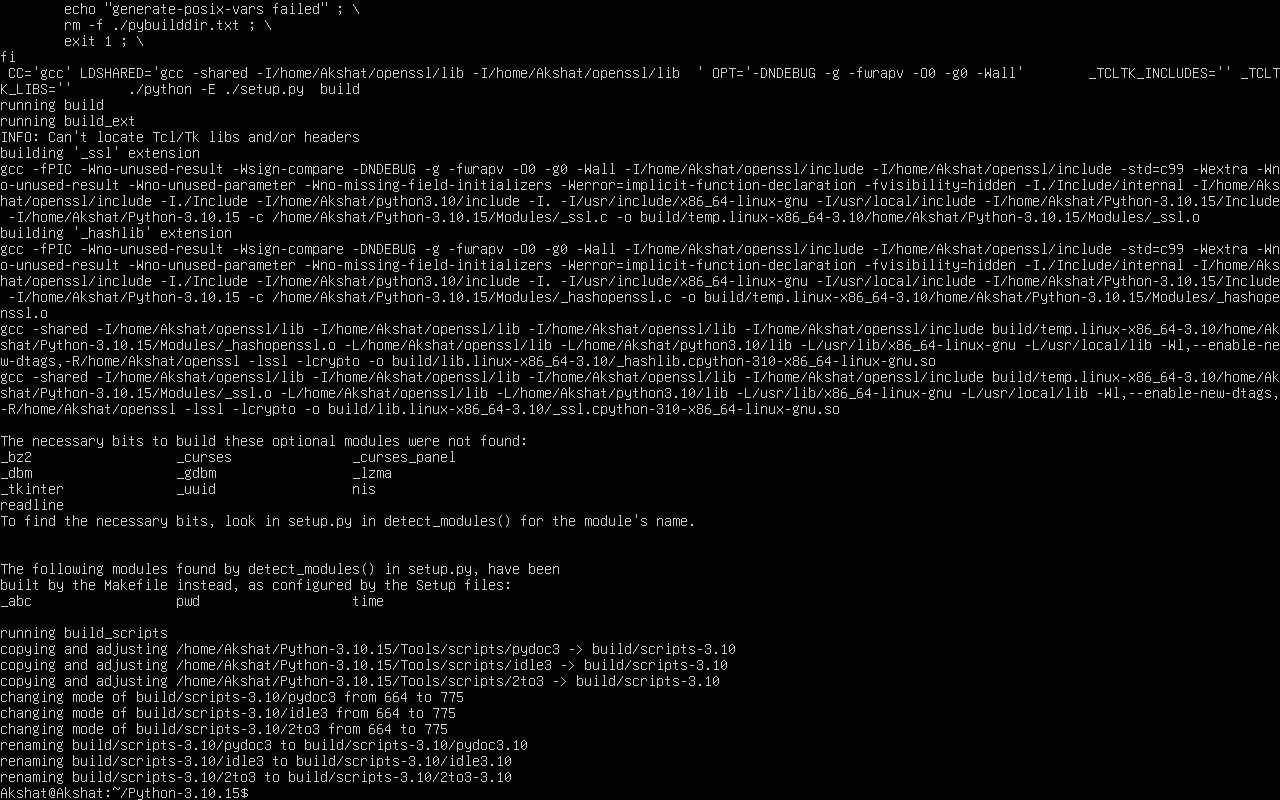

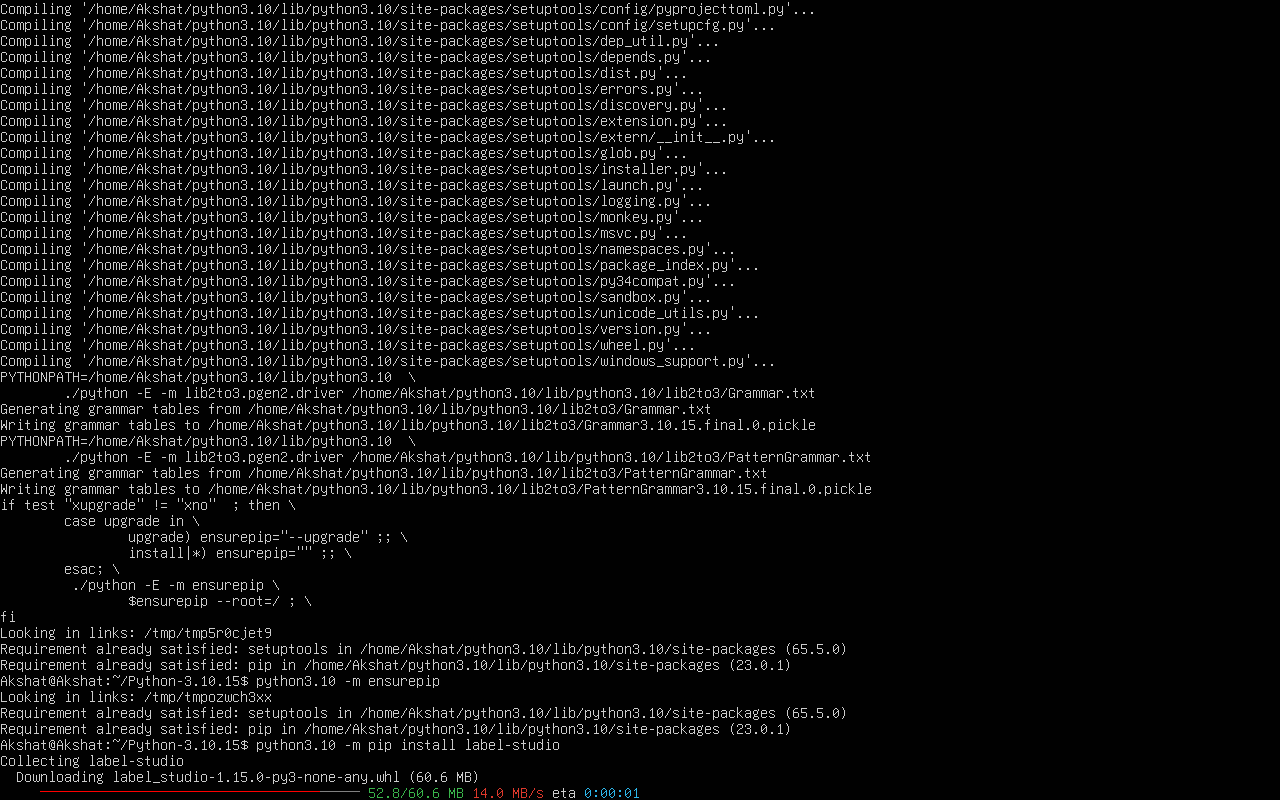

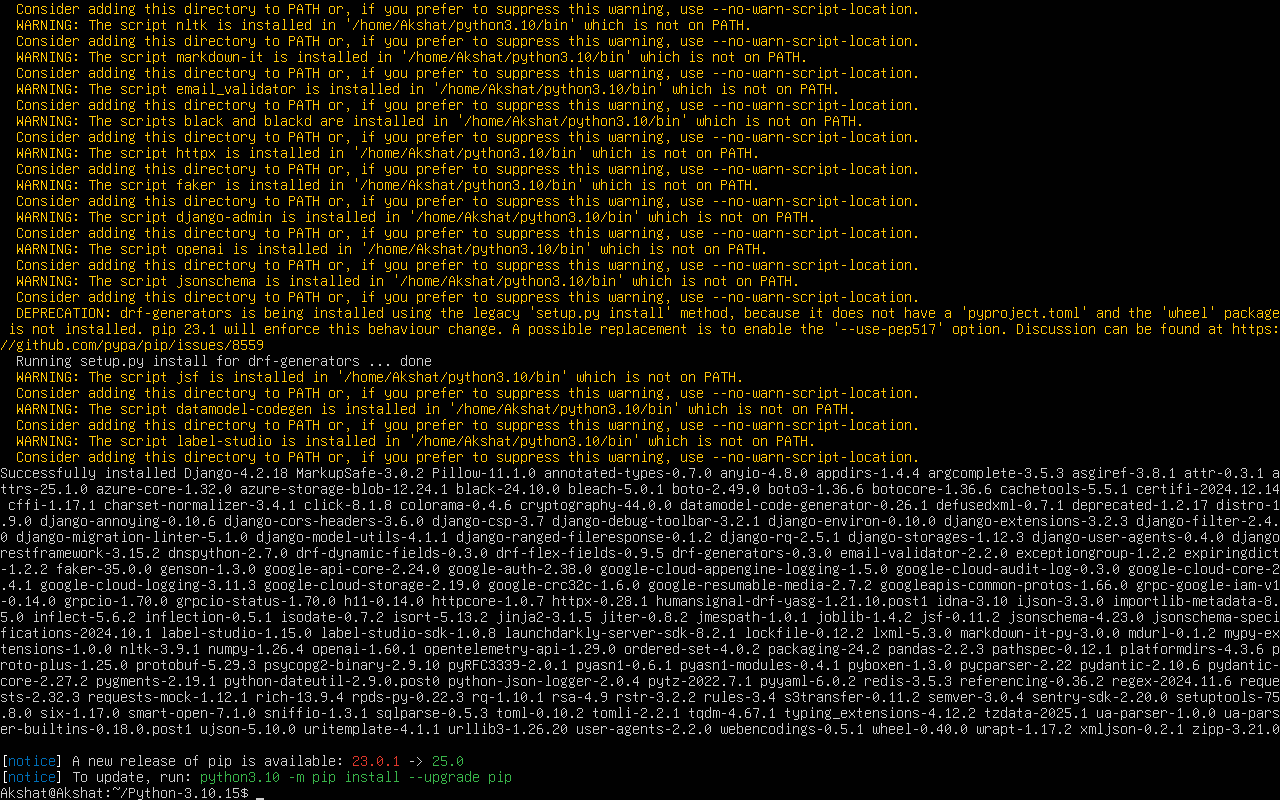

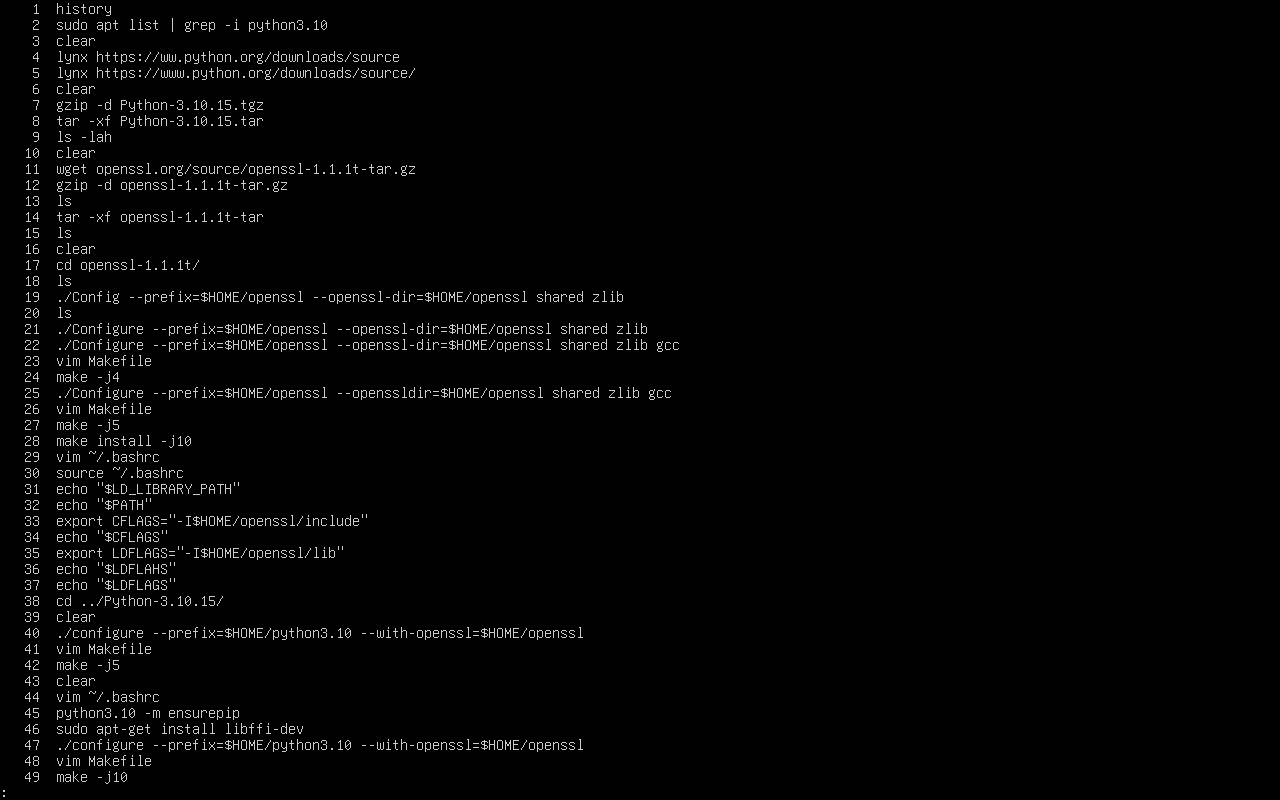

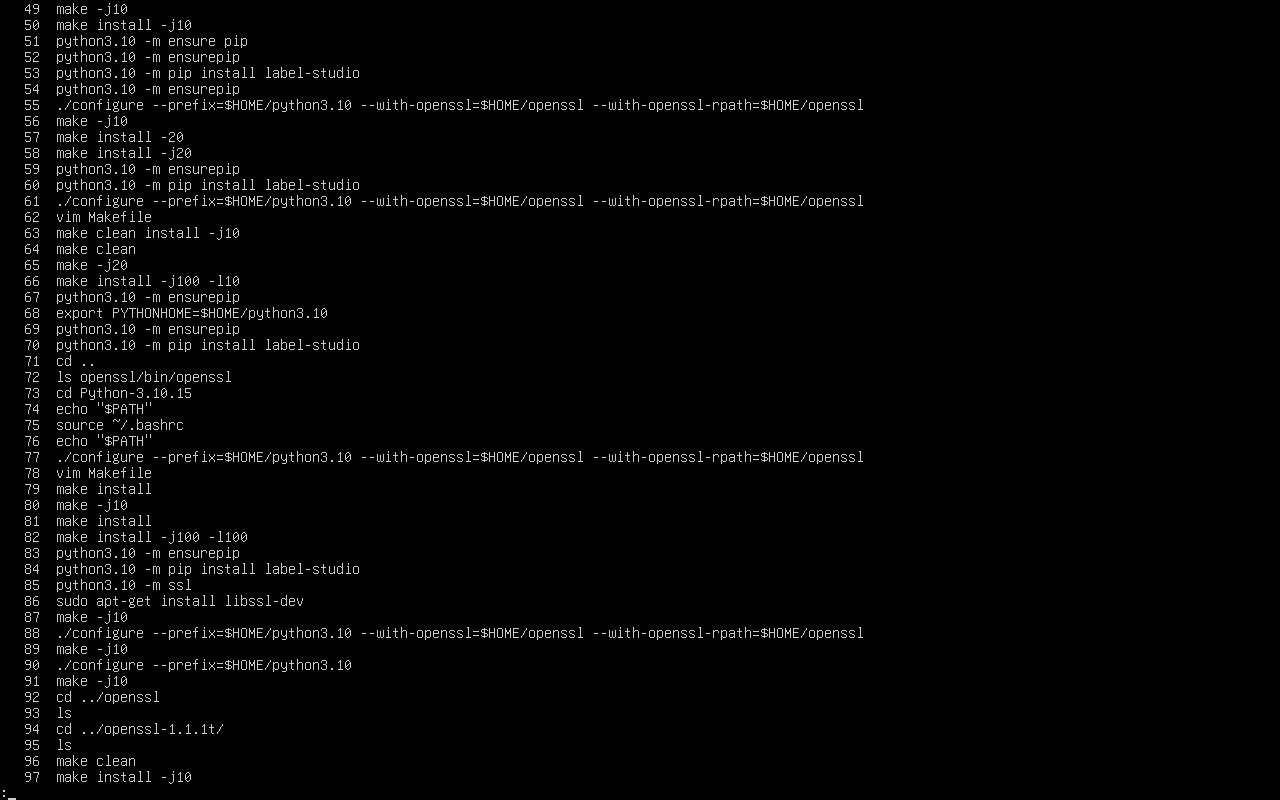

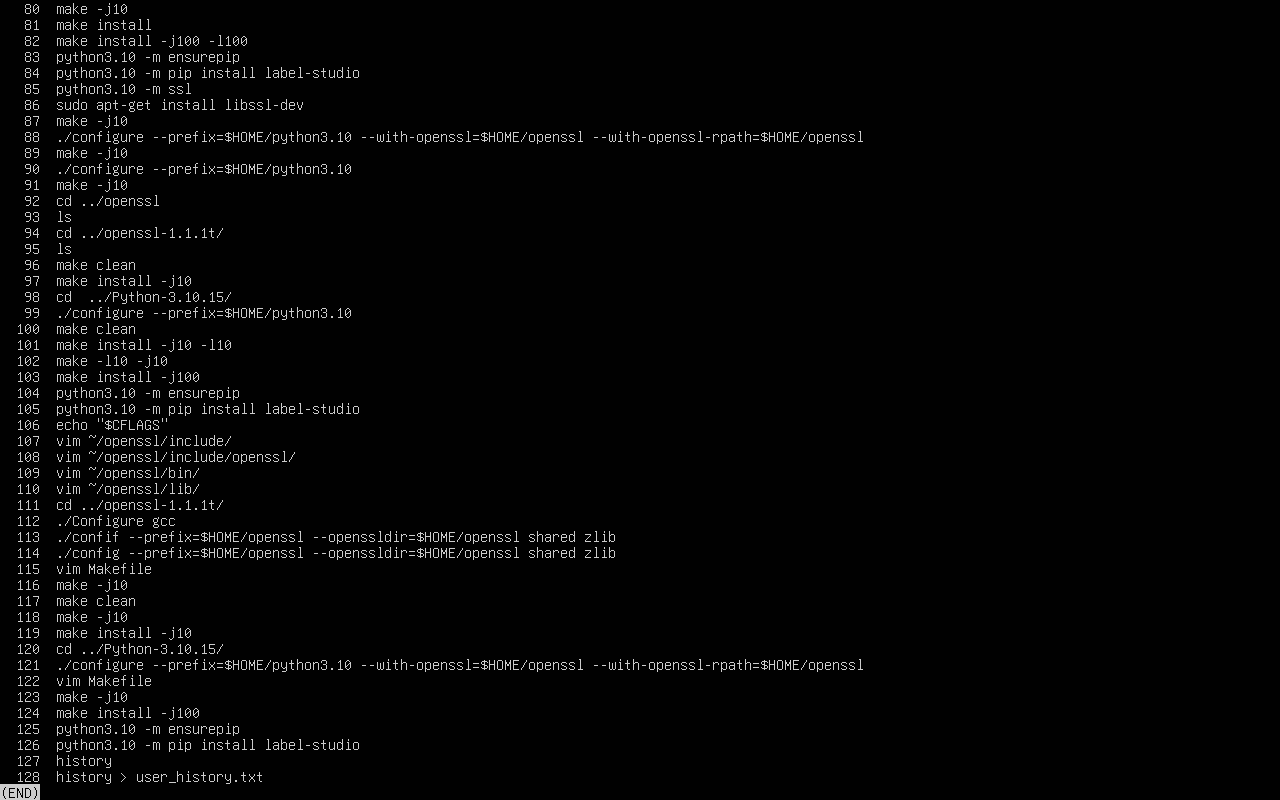

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.inter_rater import fleiss_kappa

In [3]:
# Load the CSV file with two annotators
df_cv_PARAS = pd.read_csv('Paras\project-4-at-2025-01-25-00-36-551c7f4a.csv')
df_cv_AKSHAT = pd.read_csv('Akshat\project-2-at-2025-01-23-23-42-a1f30056.csv')
df_cv_RISHANK = pd.read_csv('Rishank\project-5-at-2025-01-24-09-22-8d0ec1e1.csv')

In [4]:
print(f'PARAS: {df_cv_PARAS.shape}')
df_cv_PARAS.head()

PARAS: (20, 8)


,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at
0,21,1,No-Truck,2025-01-24T08:55:43.848784Z,14420,/data/upload/4/423bddd5-img_340.jpg,15.012,2025-01-24T08:55:43.848784Z
1,22,1,Truck,2025-01-24T08:56:07.549137Z,14421,/data/upload/4/afe8d17f-img_341.jpg,19.861,2025-01-24T08:56:07.549137Z
2,23,1,No-Truck,2025-01-24T08:56:36.973922Z,14422,/data/upload/4/aacb5d64-img_342.jpg,26.011,2025-01-24T08:56:36.973922Z
3,24,1,No-Truck,2025-01-24T08:56:48.025453Z,14423,/data/upload/4/ef3b3c70-img_343.jpg,1195.261,2025-01-24T19:03:56.212683Z
4,25,1,No-Truck,2025-01-24T08:56:58.997891Z,14424,/data/upload/4/8ee86fa4-img_344.jpg,7.616,2025-01-24T08:56:58.997891Z


In [5]:
print(f'AKSHAT: {df_cv_AKSHAT.shape}')
df_cv_AKSHAT.head()

AKSHAT: (20, 8)


,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at
0,22,1,No-Truck,2025-01-23T18:04:02.604829Z,14421,/data/upload/2/f356ded0-img_340.jpg,22.417,2025-01-23T18:04:02.604829Z
1,23,1,Truck,2025-01-23T18:04:15.455358Z,14422,/data/upload/2/d41812dd-img_341.jpg,10.531,2025-01-23T18:04:15.455358Z
2,24,1,No-Truck,2025-01-23T18:04:59.028489Z,14423,/data/upload/2/488ed916-img_342.jpg,4.650,2025-01-23T18:04:59.028489Z
3,25,1,No-Truck,2025-01-23T18:05:26.844647Z,14424,/data/upload/2/1ba6c9f6-img_343.jpg,26.401,2025-01-23T18:05:26.844647Z
4,26,1,No-Truck,2025-01-23T18:05:34.255438Z,14425,/data/upload/2/ffe56553-img_344.jpg,5.848,2025-01-23T18:05:34.255438Z


In [6]:
print(f'RISHANK: {df_cv_RISHANK.shape}')
df_cv_RISHANK.head()

RISHANK: (20, 8)


,annotation_id,annotator,choice,created_at,id,image,lead_time,updated_at
0,21,1,No-Truck,2025-01-24T09:07:34.500515Z,14460,/data/upload/5/afeb6be7-img_340.jpg,59.298,2025-01-24T09:07:34.500533Z
1,22,1,Truck,2025-01-24T09:08:56.710095Z,14461,/data/upload/5/b8ee6aef-img_341.jpg,82.075,2025-01-24T09:08:56.710111Z
2,23,1,No-Truck,2025-01-24T09:09:17.035493Z,14462,/data/upload/5/6d06a377-img_342.jpg,20.214,2025-01-24T09:09:17.035521Z
3,24,1,No-Truck,2025-01-24T09:10:20.321822Z,14463,/data/upload/5/13d5d5fb-img_343.jpg,63.178,2025-01-24T09:10:20.321838Z
4,25,1,No-Truck,2025-01-24T09:10:50.669709Z,14464,/data/upload/5/7f07c2bd-img_344.jpg,30.219,2025-01-24T09:10:50.669724Z


In [7]:
df_cv_combined = pd.DataFrame(columns=['id', 'label_PARAS', 'label_AKSHAT', 'label_RISHANK'])
df_cv_combined['id'] = df_cv_PARAS['annotation_id']
df_cv_combined['label_PARAS'] = df_cv_PARAS['choice']
df_cv_combined['label_AKSHAT'] = df_cv_AKSHAT['choice']
df_cv_combined['label_RISHANK'] = df_cv_RISHANK['choice']

In [8]:
df_cv_combined.head()

,id,label_PARAS,label_AKSHAT,label_RISHANK
0,21,No-Truck,No-Truck,No-Truck
1,22,Truck,Truck,Truck
2,23,No-Truck,No-Truck,No-Truck
3,24,No-Truck,No-Truck,No-Truck
4,25,No-Truck,No-Truck,No-Truck


In [9]:
# You may need to convert ratings to a format where each item (row) is represented by the frequency of each label. 
# For example, if your labels are categorical (like 0, 1), you'll need to count the occurrences of each label.

# If your labels are binary (e.g., 0, 1), this conversion would work fine:
# Example: convert labels into a contingency table form suitable for Fleiss' Kappa calculation

# Convert ratings into a contingency table (matrix of item x label)
# Here we assume binary labels (e.g., 0 or 1). You can modify this for more categories if needed.

In [10]:
unique_labels = ['No-Truck', 'Truck']
print(f'Unique labels: {unique_labels}')
contingency_table = []

for row in unique_labels:
    label_counts = [np.sum(row == label) for label in unique_labels]
    contingency_table.append(label_counts)

contingency_table = np.array(contingency_table)

Unique labels: ['No-Truck', 'Truck']


In [11]:
print(f'size of contingency table: {contingency_table.shape}')
contingency_table

size of contingency table: (2, 2)


array([[1, 0],
       [0, 1]])

In [12]:
# Calculate Fleiss' Kappa
fleiss_kappa_value = fleiss_kappa(contingency_table)
print(f"Fleiss' Kappa: {fleiss_kappa_value}")

Fleiss' Kappa: nan


c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\inter_rater.py:258: RuntimeWarning: invalid value encountered in divide
  p_rat = (table2.sum(1) - n_rat) / (n_rat * (n_rat - 1.))


In [13]:
# Load the CSV file with two annotators
Paras = pd.read_csv('Paras\project-1-at-2025-01-25-14-19-6072fa72.csv')
Akshat = pd.read_csv('Akshat\project-1-at-2025-01-25-12-26-21732f3b.csv')


In [14]:
Akshat.tail()

,annotation_id,annotator,created_at,id,label,lead_time,text,updated_at
16,17,1,2025-01-23T17:46:56.115734Z,356,"[{""start"":0,""end"":8,""text"":""Fintech "",""labels""...",99.508,Fintech Sector की इसी संभावना को देखते हुए IFS...,2025-01-23T17:46:56.115734Z
17,18,1,2025-01-23T17:48:47.918467Z,357,"[{""start"":0,""end"":6,""text"":""पिछले "",""labels"":[...",110.706,पिछले साल शुरू किया गया Bharat Interface for M...,2025-01-23T17:48:47.918467Z
18,19,1,2025-01-23T17:50:54.969809Z,358,"[{""start"":0,""end"":5,""text"":""इसके "",""labels"":[""...",196.370,"इसके तहत IIT, IISC, NIT जैसे संस्थानों के B Te...",2025-01-25T06:45:38.741123Z
19,20,1,2025-01-23T17:52:03.880637Z,359,"[{""start"":0,""end"":14,""text"":""इन्टेलेक्चुअल "",""...",67.811,"इन्टेलेक्चुअल Property Rights पर, और Banks के ...",2025-01-23T17:52:03.880704Z
20,21,1,2025-01-23T17:53:39.302039Z,360,"[{""start"":0,""end"":3,""text"":""कल "",""labels"":[""AD...",94.206,"कल समिट के दौरान innovation BRICS Network, और ...",2025-01-23T17:53:39.302039Z


In [15]:
Paras.tail()

,annotation_id,annotator,created_at,id,label,lead_time,text,updated_at
16,16,1,2025-01-23T19:48:32.043646Z,355,"[{""start"":0,""end"":8,""text"":""Fintech "",""labels""...",380.083,Fintech Sector की इसी संभावना को देखते हुए IFS...,2025-01-23T19:48:32.043646Z
17,17,1,2025-01-23T19:54:51.498156Z,356,"[{""start"":0,""end"":6,""text"":""पिछले "",""labels"":[...",375.578,पिछले साल शुरू किया गया Bharat Interface for M...,2025-01-23T19:54:51.498156Z
18,18,1,2025-01-23T19:59:05.384133Z,357,"[{""start"":0,""end"":5,""text"":""इसके "",""labels"":[""...",456.397,"इसके तहत IIT, IISC, NIT जैसे संस्थानों के B Te...",2025-01-25T06:11:22.928704Z
19,19,1,2025-01-23T20:01:22.520480Z,358,"[{""start"":0,""end"":14,""text"":""इन्टेलेक्चुअल "",""...",132.884,"इन्टेलेक्चुअल Property Rights पर, और Banks के ...",2025-01-25T08:48:45.813419Z
20,20,1,2025-01-23T20:04:00.891987Z,359,"[{""start"":0,""end"":3,""text"":""कल "",""labels"":[""AD...",151.432,"कल समिट के दौरान innovation BRICS Network, और ...",2025-01-23T20:04:00.891987Z


In [17]:
import ast

# Assuming df_nlp_PARAS and df_nlp_AKSHAT are your DataFrames and the 'label' column contains string representations of lists/dictionaries
for i in range(21):  # Looping over the first 21 iterations (0 to 20)
    # Convert the string representation to an actual list or data structure
    labels_PARAS = ast.literal_eval(Paras['label'][i])
    labels_AKSHAT = ast.literal_eval(Akshat['label'][i])

    # Compare the lengths of the labels
    if len(labels_PARAS) != len(labels_AKSHAT):
        print(f"Iteration {i}: Lengths do not match. PARAS length: {len(labels_PARAS)}, AKSHAT length: {len(labels_AKSHAT)}")
    else:
        pass


In [18]:
list_P=[]
list_A=[]
for i in range(21):
    dict_P=dict()
    dict_A=dict()
    # Assuming the 'annotations' column contains JSON-like data as strings
    annotations_Paras = ast.literal_eval(Paras["label"][i])  # Convert string to Python data
    annotations_Akshat = ast.literal_eval(Akshat["label"][i])  # Convert string to Python data
    
    p = annotations_Paras
    a = annotations_Akshat
    # print(p,len(p))
    # print(a,len(a))

    # Iterate through the result objects and extract the 'text' and 'labels'
    for j in range(len(p)):
        text_Paras = p[j]['text'].strip()
        # print(text_Paras)
        label_Paras = p[j]['labels'][0]
        # print(label_Paras)
        text_Akshat = a[j]['text'].strip()
        # print(text_Akshat)
        label_Akshat = a[j]['labels'][0]
        # print(label_Akshat)

        # Add the mappings to the dictionaries
        dict_P[text_Paras] = label_Paras
        dict_A[text_Akshat] = label_Akshat

    # Append the dictionaries to the lists
    list_P.append(dict_P)
    list_A.append(dict_A)

In [19]:
Annotations=pd.DataFrame(columns=['Word','Paras','Akshat'])
Annotations

,Word,Paras,Akshat


In [20]:
for i in range(20):
    for j in list_P[i] if len(list_P[i]) == len(list_A[i]) else print(f'Lengths do not match {list_P},{list_A}'):
        word = j
        row={'Word':word,'Paras':list_P[i][j],'Akshat':list_A[i][j]}
        Annotations.loc[len(Annotations)]=row

In [21]:
Annotations

,Word,Paras,Akshat
0,तुरंत,ADV,ADJ
1,सुनवाई,NOUN,NOUN
2,के,ADP,ADP
3,लिए,ADP,ADP
4,Executive,PROPN,ADJ
...,...,...,...
397,हो,VERB,VERB
398,रहा,VERB,VERB
399,है,VERB,VERB
400,।,X,X


In [407]:
Ano_1 = Annotations['Paras']
Ano_2 = Annotations['Akshat']

In [408]:
cohen_kappa_score = cohen_kappa_score(Ano_1, Ano_2)

In [409]:
print(f"Cohen's Kappa: {cohen_kappa_score}")

Cohen's Kappa: 0.7752419181420687
